### Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import math
import seaborn as sn 
from scipy.stats import multivariate_normal
from numpy.linalg import inv 

%matplotlib inline

### Generate Data Points

- Generate Data points with Gaussian Noise

In [14]:
def get_points_gaussian_noise(w0,w1):
    x = np.linspace(-1,1,10)
    y = []

    for i in x:
        gaussian_error = np.random.normal(0,.04)
        Y = w0 + w1 * i + gaussian_error
        y.append(Y)
    
    return x,y

- Generate data points 

In [15]:
def get_points(w0,w1):
    x = np.linspace(-1,1,10)
    y = []

    for i in x:
        Y = w0 + w1 * i
        y.append(Y)

    return x,y

In [16]:
x_real,y_real = get_points(-.3,.5)
x,y = get_points_gaussian_noise(-.3,.5)

- Plot the Data points

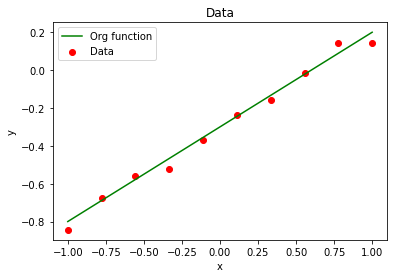

In [17]:
plt.scatter(x,y,color='red')
plt.plot(x_real,y_real,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend(['Org function','Data'],loc='upper left')
plt.show()

In [19]:
def get_gaussian_val(x,mean,var):
    sig = math.sqrt(mean)
    y = (1 / (sig * math.sqrt(2*np.pi))) * ((np.exp[-(((x - mean)*2) / (2*(sig**2)) )]))
    return y

In [20]:
def get_prior_grid_calc(w0,w1,mean,var):
    prior_grid = np.zeros(len(w0),len(w1))

    for i in range(len(w0)):
        for j in range(len(w1)):
            prior_grid[i][j] = multivariate_normal.pdf([w0[i], w1[j]], [mean,mean], [[var,0], [0,var]])
    
    return prior_grid

In [21]:
def get_likelihood_grid_calc(w0,w1,x,y):
    likelihood_grid = np.zeros(len(w0),len(w1))

    for i in range(len(w0)):
        for j in range(len(w1)):
            for k in range(len(x)):
                single_point_prob = get_gaussian_val(y[k], w0[i] + w1[j] * x[k],0.04)

                if k==0:
                    likelihood_grid[i][j] = single_point_prob
                else:
                    likelihood_grid[i][j] = likelihood_grid[i][j] * single_point_prob

    return likelihood_grid

In [22]:
def get_posterior_grid_calc(prior_grid, likelihood_grid):
    posterior_grid = likelihood_grid * prior_grid
    return posterior_grid

In [23]:
w0 = np.array(np.linspace(-1,1,100))
w1 = np.array(np.linspace(-1,1,100))

In [ ]:
def pick_n_lines(m0,s0,beta,phi,t):
    phi = np.array(phi).reshape(1,2)
    sn = inv(inv(s0) + beta*)